## 대주제: 경제 지표에 따른 사회 현상
### 세부 주제: 경기에 따른 부동산 매매가격, 전세가격 변화
* 1조 이소정
*  1인당 국민총소득(GNI)는 경기를 나타내는 지표 중 하나로, GNI가 변화하는 것에 따른 부동산 매매가격 지수, 전세가격 지수의 변화가 나타나는 가에 대해 알아봤습니다.
* **데이터**
>* GNI 데이터: 우리나라 국민이 국내는 물론 국외에서 벌어들인 소득의 실질구매력을 나타내는 지표로 실질 GDP에서 외국인이 국내에서 벌어간 실질소득은 차감하고 우리 국민이 국외에서 벌어들인 실질소득은 더하여 산출했다.  
    출처: 통계청 https://www.index.go.kr/unify/idx-info.do?idxCd=4221
>* 주택 매매가격 지수 및 전세가격 지수: 전국 주택시장의 매매, 전세, 월세가격을 조사하여 주택시장의 평균적인 가격변화를 측정, 
2021년 6월을 데이터를 100으로 두고 계산하였다.  
    출처: 한국부동산원 https://www.reb.or.kr/r-one/statistics/statisticsViewer.do?menuId=HOUSE_21111


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### GNI 데이터 가져오기

In [3]:
df1 = pd.read_excel('./data/GNI_excel.xlsx', header=2, index_col=1, nrows = 4) # 2번 째 행에서 1행부터 4개열 들고오기
df1

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
명목/원화,1인당 GNI 2),"1,886.1","1,973.0","2,070.0","2,232.6","2,353.5","2,440.7","2,673.0","2,798.6","2,898.8","2,995.1","3,094.8","3,260.2","3,411.2","3,588.6","3,693.0","3,753.9","3,776.6","4,048.2"
명목/달러화,NaN,"16,476.9","19,261.8","21,663.7","24,026.8","21,345.3","19,122.1","23,117.7","25,255.8","25,723.7","27,351.3","29,383.9","28,813.6","29,394.3","31,734.1","33,563.7","32,204.4","32,004.1","35,373.1"
실질/원화,NaN,"2,331.5","2,383.0","2,464.9","2,592.0","2,582.2","2,632.6","2,808.3","2,832.1","2,899.7","2,997.5","3,082.8","3,260.2","3,390.7","3,492.5","3,530.9","3,532.4","3,529.5","3,656.2"
증가율 3),NaN,3.9,2.2,3.4,5.2,-0.4,2.0,6.7,0.8,2.4,3.4,2.8,5.8,4.0,3.0,1.1,0.0,-0.1,3.6


In [4]:
#  df1 정보확인
print(df1.info(), df1.index, df1.columns, sep = '\n\n')

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 명목/원화 to 증가율 3)
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1 non-null      object
 1   2004        4 non-null      object
 2   2005        4 non-null      object
 3   2006        4 non-null      object
 4   2007        4 non-null      object
 5   2008        4 non-null      object
 6   2009        4 non-null      object
 7   2010        4 non-null      object
 8   2011        4 non-null      object
 9   2012        4 non-null      object
 10  2013        4 non-null      object
 11  2014        4 non-null      object
 12  2015        4 non-null      object
 13  2016        4 non-null      object
 14  2017        4 non-null      object
 15  2018        4 non-null      object
 16  2019        4 non-null      object
 17  2020        4 non-null      object
 18  2021        4 non-null      object
dtypes: object(19)
memory usage: 640.0+ bytes
None

Ind

* 연도에 따른 실질 GNI 지수 저장

In [5]:
gni_df = df1.iloc[2, 1:].reset_index().rename(columns = {'index' : 'year', '실질/원화': 'GNI'})
gni_df

,year,GNI
0,2004,"2,331.5"
1,2005,"2,383.0"
2,2006,"2,464.9"
3,2007,"2,592.0"
4,2008,"2,582.2"
5,2009,"2,632.6"
6,2010,"2,808.3"
7,2011,"2,832.1"
8,2012,"2,899.7"
9,2013,"2,997.5"


GNI 데이터가 object로 수치 데이터로 변경

In [6]:
gni_df.GNI = gni_df.GNI.apply(lambda x: float(x.replace(',', '')))
gni_df

,year,GNI
0,2004,2331.5
1,2005,2383.0
2,2006,2464.9
3,2007,2592.0
4,2008,2582.2
5,2009,2632.6
6,2010,2808.3
7,2011,2832.1
8,2012,2899.7
9,2013,2997.5


#### 부동산 매매가격지수 데이터 가져오기

In [7]:
df2 = pd.read_excel('./data/월간_매매가격지수_종합.xlsx',header=10) 
df2.head(5)

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2003년 11월,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
0,전국,NaN,NaN,NaN,61.451824,60.963185,60.652009,60.743829,60.842376,60.935649,...,104.750185,104.768133,104.829612,104.844014,104.837210,104.758261,104.459050,103.949855,103.148521,101.736171
1,수도권,NaN,NaN,NaN,55.765538,55.359195,55.116437,55.228958,55.376448,55.511443,...,106.096471,106.054496,106.085391,106.047282,106.000446,105.847246,105.421458,104.742401,103.674704,101.838685
2,지방권,NaN,NaN,NaN,68.358856,67.760797,67.3565,67.416319,67.441927,67.47331,...,103.564452,103.634568,103.722689,103.782879,103.811013,103.796938,103.608525,103.248399,102.681709,101.644873
3,6대광역시,NaN,NaN,NaN,60.555931,59.922991,59.557162,59.574504,59.636041,59.685955,...,104.478175,104.419594,104.394368,104.289894,104.167698,103.989532,103.527370,102.811406,101.810075,100.043103
4,5대광역시,NaN,NaN,NaN,61.78014,61.119917,60.744738,60.787542,60.892069,60.948611,...,103.583307,103.519435,103.482909,103.396330,103.281525,103.131796,102.735104,102.076980,101.179429,99.630710


#### 부동산 전세가격지수 데이터 가져오기

In [8]:
df3 = pd.read_excel('./data/월간_전세가격지수_종합.xlsx', header = 10)
df3.head(5)

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2003년 12월,2004년 01월,2004년 02월,2004년 03월,2004년 04월,2004년 05월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
0,전국,NaN,NaN,NaN,59.575331,59.209691,59.30727,59.466954,59.514041,59.362426,...,103.249443,103.230765,103.236549,103.233453,103.209187,103.123228,102.837952,102.327543,101.425319,99.856381
1,수도권,NaN,NaN,NaN,53.381388,52.998164,53.078503,53.244122,53.249467,53.025346,...,103.982781,103.895104,103.866768,103.842949,103.797600,103.662013,103.255555,102.553070,101.285404,99.077302
2,지방권,NaN,NaN,NaN,66.518315,66.193285,66.312755,66.457653,66.564598,66.525896,...,102.600072,102.642125,102.677967,102.693137,102.687462,102.645292,102.467106,102.126915,101.550208,100.556053
3,6대광역시,NaN,NaN,NaN,60.423033,59.92439,59.967838,60.110615,60.176017,60.021967,...,103.025092,102.901168,102.802714,102.645678,102.429101,102.182559,101.677428,100.949468,99.868166,98.050936
4,5대광역시,NaN,NaN,NaN,62.114685,61.649051,61.717534,61.88707,61.986271,61.875552,...,102.590340,102.509347,102.406738,102.256441,102.067831,101.851510,101.430981,100.768273,99.775736,98.142464


In [9]:
# 전국의 주택 매매 가격 지수 가져오기
sale = df2.iloc[0, 4:].to_frame().reset_index().rename(columns = {'index':'year', 0:'Sales'})
sale.head(5)

,year,Sales
0,2003년 11월,61.451824
1,2003년 12월,60.963185
2,2004년 01월,60.652009
3,2004년 02월,60.743829
4,2004년 03월,60.842376


In [10]:
# 전국의 주택 전세 가격 지수 가져오기
charter = df3.iloc[0, 4:].to_frame().reset_index().rename(columns = {'index':'year', 0:'Jeonse'})
charter.head(5)

,year,Jeonse
0,2003년 12월,59.575331
1,2004년 01월,59.209691
2,2004년 02월,59.30727
3,2004년 03월,59.466954
4,2004년 04월,59.514041


In [11]:
# 주택 가격에 관한 데이터를 하나의 데이터프레임으로 변환
house = pd.merge(sale, charter)
house.head(5)

,year,Sales,Jeonse
0,2003년 12월,60.963185,59.575331
1,2004년 01월,60.652009,59.209691
2,2004년 02월,60.743829,59.30727
3,2004년 03월,60.842376,59.466954
4,2004년 04월,60.935649,59.514041


In [12]:
# 정보확인
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    228 non-null    object
 1   Sales   228 non-null    object
 2   Jeonse  228 non-null    object
dtypes: object(3)
memory usage: 7.1+ KB


In [13]:
# 연도 뽑기
house.year = house.year.apply(lambda x: x[:4])

# 매매 및 전세 데이터 타입 변경
house[['Sales', 'Jeonse']] = house[['Sales', 'Jeonse']].astype('float64')
house

,year,Sales,Jeonse
0,2003,60.963185,59.575331
1,2004,60.652009,59.209691
2,2004,60.743829,59.307270
3,2004,60.842376,59.466954
4,2004,60.935649,59.514041
...,...,...,...
223,2022,104.758261,103.123228
224,2022,104.459050,102.837952
225,2022,103.949855,102.327543
226,2022,103.148521,101.425319


In [14]:
# 정보확인
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    228 non-null    object 
 1   Sales   228 non-null    float64
 2   Jeonse  228 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.1+ KB


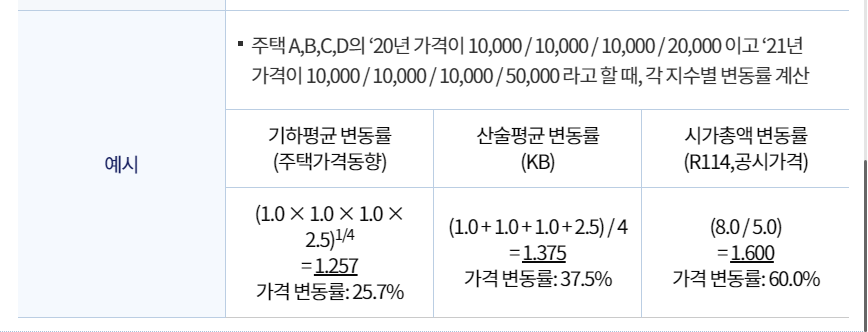
https://www.reb.or.kr/r-one/statistics/statisticsViewer.do?menuId=HOUSE_21111

주택 매매 및 전세 가격 지수는 월별 데이터로 년간 데이터로 변경 시, 한국부동산원에서 권장한 주택가격동향 계산 방법은 기하평균이다. 

In [15]:
import statistics as st
# st.geometric_mean(list_values) 기하평균 값들을 곱한 뒤 루트를 씌운 값

y, s, c = [], [], []                    # year, sale, charter
for i in range(2004, 2022):
    y.append(str(i))
    h = house[house.year == str(i)]
    s.append(st.geometric_mean(h.Sales))
    c.append(st.geometric_mean(h.Jeonse))

In [16]:
# 리스트 정보확인
print(y, len(y))
print(s, len(s))
print(c, len(c))

['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'] 18
[60.429505728866744, 60.72042461374813, 64.32713379369024, 71.22541433947217, 76.23084137539591, 77.10885695066271, 78.83645953119704, 82.41983923079086, 83.96065325795139, 82.89956036590208, 84.10434609628173, 86.33847894304232, 87.948797076428, 88.945111925013, 90.20689448382032, 90.02018907547335, 92.56551398174356, 100.39539319016923] 18
[58.2377054692459, 56.779507864791874, 59.628052098694596, 63.20105989041464, 65.9782106254169, 66.39513670731888, 70.43309908951335, 78.02215289454371, 81.92772058059438, 84.31912825565601, 88.16471055810071, 91.70571656932626, 94.35354263187776, 95.25793495168736, 94.57702245564961, 92.67553429344306, 94.23219961426753, 100.39136684515964] 18


In [17]:
# 연도별 지수를 계산한 데이터로 데이터 프레임 만들기
house_3 = pd.DataFrame({'year': y, 'Sales':s, 'Jeonse': c})
house_3

,year,Sales,Jeonse
0,2004,60.429506,58.237705
1,2005,60.720425,56.779508
2,2006,64.327134,59.628052
3,2007,71.225414,63.201060
4,2008,76.230841,65.978211
5,2009,77.108857,66.395137
6,2010,78.836460,70.433099
7,2011,82.419839,78.022153
8,2012,83.960653,81.927721
9,2013,82.899560,84.319128


In [18]:
house_3.info()
gni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    18 non-null     object 
 1   Sales   18 non-null     float64
 2   Jeonse  18 non-null     float64
dtypes: float64(2), object(1)
memory usage: 560.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    18 non-null     object 
 1   GNI     18 non-null     float64
dtypes: float64(1), object(1)
memory usage: 416.0+ bytes


In [19]:
# gni와 주택 지수의 데이터 합치기
total = pd.merge(gni_df, house_3)
total

,year,GNI,Sales,Jeonse
0,2004,2331.5,60.429506,58.237705
1,2005,2383.0,60.720425,56.779508
2,2006,2464.9,64.327134,59.628052
3,2007,2592.0,71.225414,63.201060
4,2008,2582.2,76.230841,65.978211
5,2009,2632.6,77.108857,66.395137
6,2010,2808.3,78.836460,70.433099
7,2011,2832.1,82.419839,78.022153
8,2012,2899.7,83.960653,81.927721
9,2013,2997.5,82.899560,84.319128


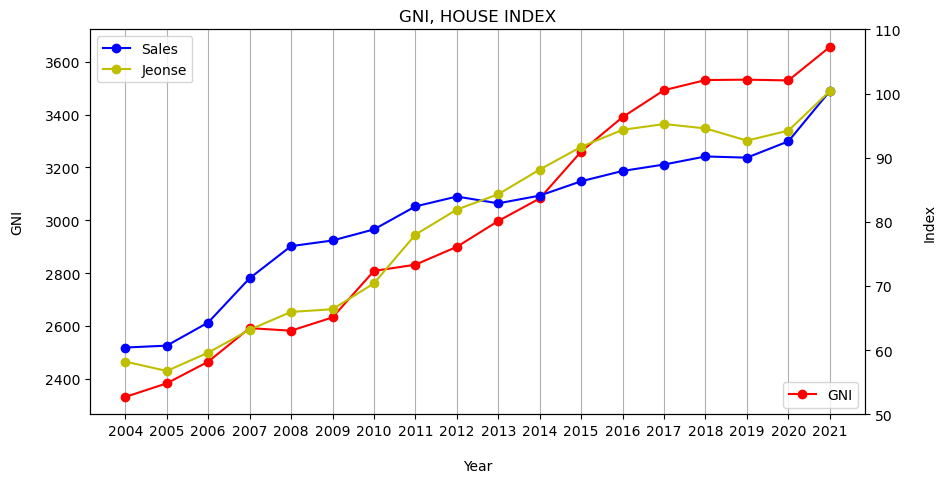

In [20]:
# GNI, 주택매매가격지수, 주택전세가격지수의 분포
fig, ax1 = plt.subplots(figsize = (10, 5))
ax2 = ax1.twinx()

ax1.plot(total.year, total.GNI, 'ro-', label = 'GNI')
ax2.plot(total.year, total.Sales, 'bo-', label ='Sales')
ax2.plot(total.year, total.Jeonse, 'yo-', label = 'Jeonse')

ax1.set_ylabel('GNI', labelpad=15)
ax2.set_ylabel('Index', labelpad=15)

ax1.set_xlabel('Year', labelpad=15)

ax2.set_ylim(50, 110)

ax1.grid(axis = 'x')

ax1.legend(loc = 4)
ax2.legend(loc = 'upper left')

plt.title('GNI, HOUSE INDEX')

plt.show()

* gni에 따른 부동산 가격 변동

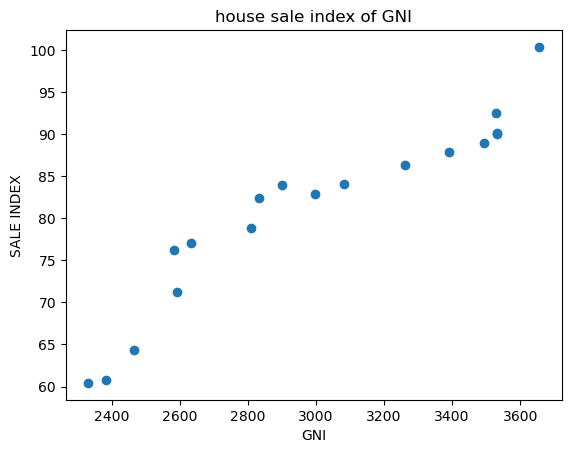

In [21]:
# GNI와 주택전세가격 지수의 산점도 
import matplotlib.pyplot as plt

plt.scatter(total.GNI, total.Sales)

plt.xticks()
plt.xlabel('GNI')
plt.ylabel('SALE INDEX')
plt.title('house sale index of GNI')
plt.show()

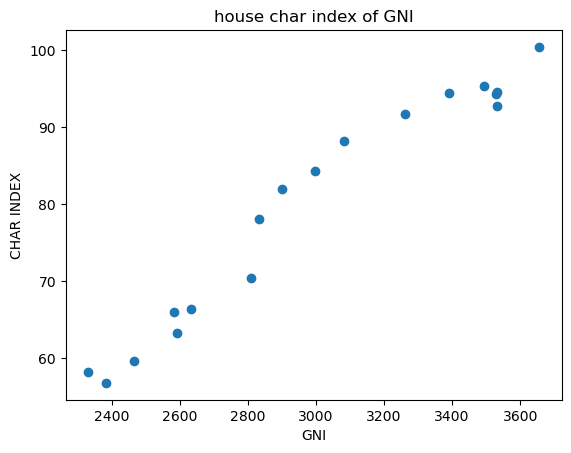

In [22]:
# GNI와 주택전세가격 지수의 산점도 
plt.scatter(total.GNI, total.Jeonse)
plt.xlabel('GNI')
plt.ylabel('CHAR INDEX')
plt.title('house char index of GNI')
plt.show()

In [23]:
# 상관관계 분석
cor = total.corr(method='pearson')
cor

,GNI,Sales,Jeonse
GNI,1.000000,0.938932,0.975619
Sales,0.938932,1.000000,0.949660
Jeonse,0.975619,0.949660,1.000000


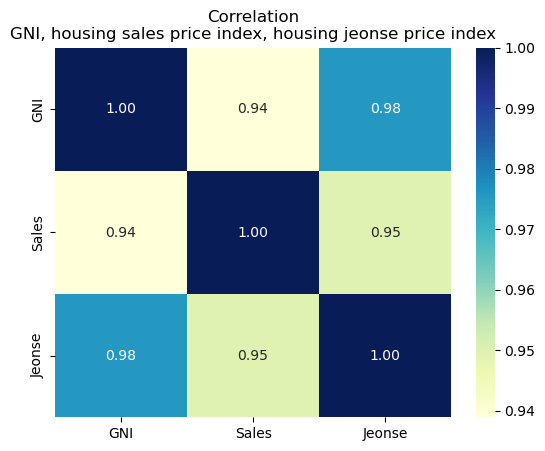

In [24]:
sns.heatmap(cor, annot=True, fmt=".2f", cmap = 'YlGnBu')
plt.title('Correlation\nGNI, housing sales price index, housing jeonse price index')
plt.show()

* **GNI**와 **주택매매가격지수**의 상관관계를 분석한 결과 상관계수가 0.938932으로 상관정도가 매우 높게 나왔습니다. 
    - GNI가 높아질수록 주택매매가격지수 또한 높아집니다. 

* **GNI**와 **주택전세가격지수**의 상관관계를 분석한 결과 상관계수가 0.0.975619 상관정도가 매우 높게 나왔습니다. 
    - GNI가 높아질수록 주택전세가격지수 또한 높아집니다.   
<br/><br/>
▶ 경기가 안좋으면 부동산을 매매와 전세 시 부담높고, 경기가 좋아지면 상대적으로 매매, 전세 시 부담이 적어진다

범죄, 자살 상관X
물가, 자동차,